Notebook of DE analysis between SF3B1 mutant and wildtype!
I concatenated the 2D pass and 2D fail reads for each condition into one fastq file. I aligned using bwa mem. I used Angela's script to count alignments. 

In [ ]:
~/bl/bin/bwa-0.7.15/bwa mem -t 8 ~/bl/atang/reference/gencode.v24.transcripts.fa wt_2d_passfail.fq > wt_2d_passfail.sam &
python geneCountFromSam.py -i manifest -o jone_bwa.counts

In [4]:
setwd('~/bme/jupyter_data/')
library('DESeq2')
mt = read.table('jone_bwa.isoform.merged.counts', header=F)
wt = read.table('eiho_bwa.isoform.merged.counts', header=F)
head(mt)
head(wt)

V1,V2
A1BG,2
A1BG-AS1,2
A1CF,2
A2M-AS1,1
AACS,3
AAED1,5


V1,V2
5_8S_rRNA,1
A1BG,2
A1BG-AS1,1
A2ML1,2
AAAS,3
AACS,8


In [5]:
allgenes = unique(c(as.character(mt$V1), as.character(wt$V1)))
counts = data.frame(mt=rep(0, length(allgenes)), wt=rep(0, length(allgenes)))
rownames(counts) = allgenes
counts$mt = mt$V2[match(allgenes, mt$V1)]
counts$wt = wt$V2[match(allgenes, wt$V1)]
counts$mt[is.na(counts$mt)] = 0
counts$wt[is.na(counts$wt)] = 0
head(counts)
nrow(counts)

dds = DESeqDataSetFromMatrix(countData = as.matrix(counts), colData = data.frame(condition=c('wt', 'mt')), design=~condition)
dds = DESeq(dds)
res = results(dds, alpha=0.05)
sig = res[res$pvalue < 0.05,]

,mt,wt
A1BG,2,2
A1BG-AS1,2,1
A1CF,2,0
A2M-AS1,1,0
AACS,3,8
AAED1,5,5


[1] 15395

converting counts to integer mode
estimating size factors
estimating dispersions
Warning message in checkForExperimentalReplicates(object, modelMatrix):
"same number of samples and coefficients to fit,
  estimating dispersion by treating samples as replicates.
  read the ?DESeq section on 'Experiments without replicates'"gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


log2 fold change (MAP): condition wt vs mt 
Wald test p-value: condition wt vs mt 
DataFrame with 6 rows and 6 columns
          baseMean log2FoldChange     lfcSE          stat    pvalue      padj
         <numeric>      <numeric> <numeric>     <numeric> <numeric> <numeric>
A1BG           2.0   1.326132e-16  2.079590  6.376890e-17 1.0000000         1
A1BG-AS1       1.5   4.242683e-01  2.058155  2.061401e-01 0.8366815         1
A1CF           1.0   1.119306e+00  1.887972  5.928613e-01 0.5532740         1
A2M-AS1        0.5   8.892342e-01  1.793242  4.958808e-01 0.6199785         1
AACS           5.5  -9.926376e-01  1.898277 -5.229152e-01 0.6010333         1
AAED1          5.0  -7.182671e-16  1.912720 -3.755212e-16 1.0000000         1

[1] 0

[1] 24

log2 fold change (MAP): condition wt vs mt 
Wald test p-value: condition wt vs mt 
DataFrame with 55 rows and 6 columns
            baseMean log2FoldChange     lfcSE      stat      pvalue      padj
           <numeric>      <numeric> <numeric> <numeric>   <numeric> <numeric>
AC007192.4      30.0       2.734434 1.4208157  1.924552  0.05428543         1
AC097374.2       6.0       3.466320 2.0386383  1.700312  0.08907234         1
ACTB           492.5       1.977755 0.9496469  2.082621  0.03728575         1
ACTG1           60.0       2.534959 1.2270384  2.065917  0.03883636         1
AIF1            21.0       3.038886 1.5702353  1.935306  0.05295277         1
...              ...            ...       ...       ...         ...       ...
TSPO            11.5       3.223468  1.806487  1.784385 0.074361082         1
TYROBP          15.0       3.601583  1.758084  2.048584 0.040502768         1
U2              43.5      -4.442650  1.544774 -2.875922 0.004028496         1
UBL7             8.5  

logFC,negLogPval
1.326132e-16,0.000000e+00
4.242683e-01,7.743984e-02
1.119306e+00,2.570598e-01
8.892342e-01,2.076233e-01
-9.926376e-01,2.211015e-01
-7.182671e-16,1.446491e-16


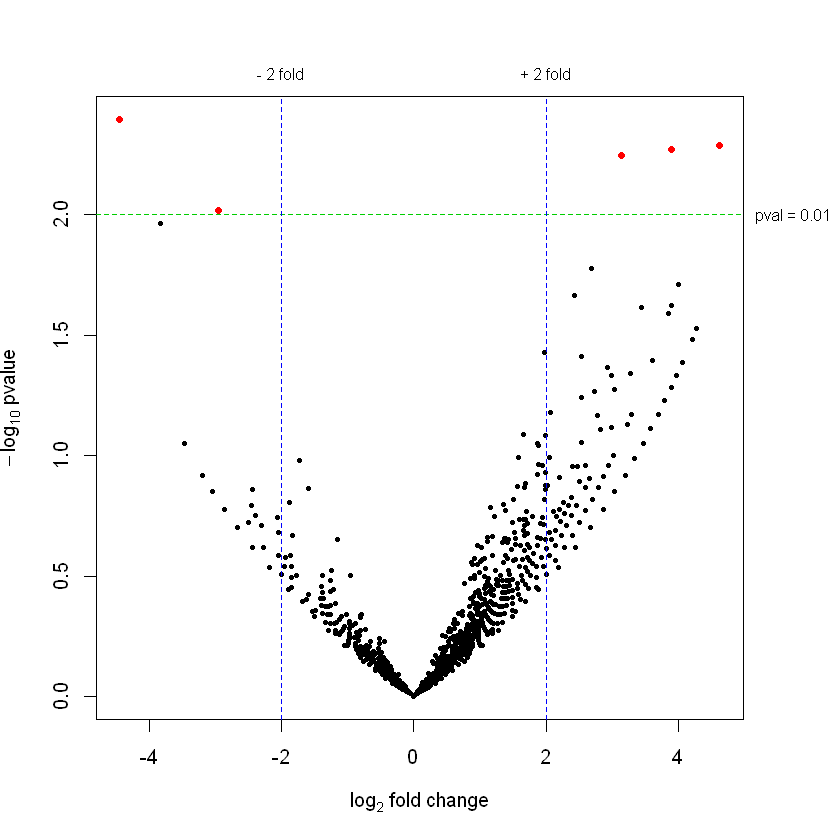

In [9]:
head(res)
sum(res$padj[!is.na(res$padj)]!=1)
# sig_genes = rownames(res)[!is.na(res$padj) & res$padj < 0.05]
sig = res[res$pvalue < 0.05,]
nrow(sig)
res[res$pvalue<0.1,]
sig_genes = rownames(res)[res$pvalue<0.1]
tab = data.frame(logFC = res$log2FoldChange, negLogPval = -log10(res$pvalue))
head(tab)
par(mar = c(5, 4, 4, 4))
plot(tab, pch = 16, cex = 0.6, xlab = expression(log[2]~fold~change), ylab = expression(-log[10]~pvalue))
lfc = 2
pval = 0.01
signGenes = (abs(tab$logFC) > lfc & tab$negLogPval > -log10(pval))
points(tab[signGenes, ], pch = 16, cex = 0.8, col = "red") 
abline(h = -log10(pval), col = "green3", lty = 2) 
abline(v = c(-lfc, lfc), col = "blue", lty = 2) 
mtext(paste("pval =", pval), side = 4, at = -log10(pval), cex = 0.8, line = 0.5, las = 1) 
mtext(c(paste("-", lfc, "fold"), paste("+", lfc, "fold")), side = 3, at = c(-lfc, lfc), cex = 0.8, line = 0.5)

It's evident that there are more reads in the mutant than wildtype run and this is reflected in the differential expression analysis. DESeq without replicates might not normalize for library size. Genes of interest are IGKC, TMEM107, U2, SNORD118.

In [10]:
counts[rownames(counts) %in% sig_genes,]

,mt,wt
AC007192.4,54,6
AC097374.2,12,0
ACTB,798,187
ACTG1,105,15
AIF1,39,3
ANXA1,18,0
ANXA2,40,4
CCDC191,22,1
CCL5,53,3
CD68,54,5
